In [1]:
import codecs, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms
from IPython.display import display

In [2]:
%matplotlib inline

In [3]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")
sns.set_color_codes("muted")
#sns.palplot(sns.color_palette("hls", 8))
#sns.palplot(sns.color_palette("husl", 8))

In [4]:
fLexFilms4="/Users/gilles/Downloads/Lexique4_min+filtr+cat+separ+corr3.tsv"
fLexFilms4="Lexique4.tsv"

In [5]:
dtype={i:"unicode" for i in range(6)}
dtype[6]=np.float64

- pas de header dans le fichier Gauvain => read_csv header=None
- mais il y en a un dans le fichier GB Lexique4.tsv => read_csv header="infer"

In [6]:
dfLexFilms4=pd.read_csv(filepath_or_buffer=fLexFilms4,sep="\t",#header=None,
                        skip_blank_lines=True,encoding="utf8",
                       dtype=dtype)
dfLexFilms4.columns="graphie lemme cat infover genre nombre occurrences".split(" ")

In [7]:
dfLex4=dfLexFilms4.sort_values(["lemme","cat"]).reset_index().drop(columns="index")
dfLex4

,graphie,lemme,cat,infover,genre,nombre,occurrences
0,!,!,ADV,NaN,NaN,NaN,10.0
1,$,$,NOM,NaN,m,p,53371.0
2,%,%,NOM,NaN,m,NaN,29248.0
3,(,(,ADV,NaN,NaN,NaN,3.0
4,),),ADV,NaN,NaN,NaN,7.0
5,+,+,CON,NaN,NaN,NaN,1006.0
6,",",",",ADV,NaN,NaN,NaN,176.0
7,-ce,-ce,ADJ:dem,NaN,m,s,43.0
8,-ce,-ce,PRO:dem,NaN,NaN,NaN,244781.0
9,-ce,-ce,PRO:dem,NaN,NaN,p,407.0


In [8]:
catV=["VER","AUX"]
dfVerbes4=dfLex4.loc[dfLex4["cat"].isin(catV),:]
dfVerbes4=dfVerbes4.fillna("").groupby("graphie lemme infover genre nombre".split(" ")).sum().reset_index()

In [9]:
dfVerbes4.loc[:,"rangFWV"]=dfVerbes4.loc[:,"occurrences"].rank(ascending=False)
dfV4=dfVerbes4.sort_values("rangFWV").reset_index().drop(columns="index")
dfV4

,graphie,lemme,infover,genre,nombre,occurrences,rangFWV
0,est,être,ind:pre:3,,s,7111273.0,1.0
1,a,avoir,ind:pre:3,,s,3668058.0,2.0
2,ai,avoir,ind:pre:1,,s,2407163.0,3.0
3,as,avoir,ind:pre:2,,s,1021787.0,4.0
4,était,être,ind:imp:3,,s,982148.0,5.0
5,faire,faire,inf;,,,958743.0,6.0
6,va,aller,ind:pre:3,,s,878202.0,7.0
7,sais,savoir,ind:pre:1,,s,862224.0,8.0
8,suis,suivre,ind:pre:1,,s,834976.0,9.0
9,es,être,ind:pre:2,,s,697229.0,10.0


## Filtrer les scories de Lexique4
- quelques formes fléchies sont notées avec des lemmes qui ne correspondent pas à un verbe
- quelques formes ne sont pas identifiées : infover = NaN
- une forme est indiquée comme impératif 3S

Dans tous les cas, on remplace l'étiquette de Lexique.org par l'étiquette Grace

In [10]:
dfV4.infover.unique()

array([u'ind:pre:3', u'ind:pre:1', u'ind:pre:2', u'ind:imp:3', u'inf;',
       u'par:pas:', u'inf', u'imp:pre:2', u'ind:imp:1', u'ind:fut:3',
       u'sub:pre:3', u'cnd:pre:3', u'cnd:pre:1', u'imp:pre:1', '',
       u'ind:imp:2', u'cnd:pre:2', u'ind:fut:1', u'ind:fut:2', u'par:pre',
       u'sub:pre:2', u'ind:pas:3', u'sub:pre:1', u'ind:pas:1',
       u'ind:pas:2', u'imp:pre:2s;ind:pre:1s;ind:pre:3s;sub:pre:3s;',
       u'imp:pre:2p;ind:pre:2p;par:pas;', u'imp:pre:1p;ind:pre:1p;',
       u'sub:imp:3', u'ind:pas:3s;', u'sub:imp:1', u'imp:pre:3',
       u'sub:imp:2'], dtype=object)

In [11]:
def infover2Case(lRow):
    result=""
    lInfover=lRow["infover"]
    lNombre=lRow["nombre"]
    if isinstance(lInfover,unicode):
        if lInfover in [u'imp:pre:2p;ind:pre:2p;par:pas;',
       u'imp:pre:2s;ind:pre:1s;ind:pre:3s;sub:pre:3s;',
       u'imp:pre:1p;ind:pre:1p;']:
            print lRow["graphie"],lRow["lemme"]
        else:
            if lInfover[:3]==u"inf":
                result=u"inf"
            elif lInfover==u"par:p":
                result="pP"
            elif lInfover[:8]==u"par:pas:":
                if lNombre in ["s","p"]:
                    lNombre=lNombre.upper()
                else:
                    print lRow
                lGenre=lRow["genre"]
                if lGenre in ["m","f"]:
                    lGenre=lGenre.upper()
                else:
                    print lRow
                result="pp"+lGenre+lNombre
            else:
                if lNombre in ["s","p"]:
                    lNombre=lNombre.upper()
                    if lInfover[:8]==u"ind:pre:":
                        result="pi"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"ind:imp:":
                        result="ii"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"ind:fut:":
                        result="fi"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"ind:pas:":
                        result="ai"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"imp:pre:":
                        result="pI"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"sub:pre:":
                        result="ps"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"sub:imp:":
                        result="is"+lInfover[8]+lNombre
                    elif  lInfover[:8]==u"cnd:pre:":
                        result="pc"+lInfover[8]+lNombre
                else:
                    print lRow               
    return result

print "Problèmes de lemme"
dfV4["case"]=dfV4.apply(infover2Case,axis=1)

Problèmes de lemme
graphie        maintenant
lemme           maintenir
infover           par:pre
genre                    
nombre                   
occurrences         29608
rangFWV               288
Name: 287, dtype: object
graphie          étant
lemme             être
infover        par:pre
genre                 
nombre                
occurrences      15671
rangFWV            502
Name: 501, dtype: object
graphie        attendant
lemme           attendre
infover          par:pre
genre                   
nombre                  
occurrences        13202
rangFWV              590
Name: 589, dtype: object
graphie        faisant
lemme            faire
infover        par:pre
genre                 
nombre                
occurrences      11986
rangFWV            644
Name: 643, dtype: object
graphie         disant
lemme             dire
infover        par:pre
genre                 
nombre                
occurrences      10742
rangFWV            705
Name: 704, dtype: object
graphie         

graphie         aidant
lemme            aider
infover        par:pre
genre                 
nombre                
occurrences        872
rangFWV         4692.5
Name: 4688, dtype: object
graphie         buvant
lemme            boire
infover        par:pre
genre                 
nombre                
occurrences        869
rangFWV           4708
Name: 4708, dtype: object
graphie        croyant
lemme           croire
infover        par:pre
genre                 
nombre                
occurrences        855
rangFWV         4754.5
Name: 4751, dtype: object
graphie        hurlant
lemme           hurler
infover        par:pre
genre                 
nombre                
occurrences        850
rangFWV           4778
Name: 4778, dtype: object
graphie         menant
lemme            mener
infover        par:pre
genre                 
nombre                
occurrences        849
rangFWV         4783.5
Name: 4782, dtype: object
graphie         basant
lemme            baser
infover        par:

Name: 7821, dtype: object
graphie         payant
lemme            payer
infover        par:pre
genre                 
nombre                
occurrences        390
rangFWV         7826.5
Name: 7828, dtype: object
graphie        expliquant
lemme           expliquer
infover           par:pre
genre                    
nombre                   
occurrences           382
rangFWV              7927
Name: 7924, dtype: object
graphie        attaquant
lemme           attaquer
infover          par:pre
genre                   
nombre                  
occurrences          379
rangFWV           7969.5
Name: 7973, dtype: object
graphie        forçant
lemme           forcer
infover        par:pre
genre                 
nombre                
occurrences        378
rangFWV           7979
Name: 7982, dtype: object
graphie        oubliant
lemme           oublier
infover         par:pre
genre                  
nombre                 
occurrences         376
rangFWV          8002.5
Name: 8003, dtype: obje

graphie        possédant
lemme           posséder
infover          par:pre
genre                   
nombre                  
occurrences          226
rangFWV            10794
Name: 10804, dtype: object
graphie        réalisant
lemme           réaliser
infover          par:pre
genre                   
nombre                  
occurrences          225
rangFWV            10819
Name: 10813, dtype: object
graphie        pointant
lemme           pointer
infover         par:pre
genre                  
nombre                 
occurrences         222
rangFWV           10910
Name: 10902, dtype: object
graphie        contrôlant
lemme           contrôler
infover           par:pre
genre                    
nombre                   
occurrences           222
rangFWV             10910
Name: 10917, dtype: object
graphie        éliminant
lemme           éliminer
infover          par:pre
genre                   
nombre                  
occurrences          221
rangFWV          10935.5
Name: 10928, dtyp

graphie        sacrifiant
lemme           sacrifier
infover           par:pre
genre                    
nombre                   
occurrences           147
rangFWV           13725.5
Name: 13718, dtype: object
graphie        vérifiant
lemme           vérifier
infover          par:pre
genre                   
nombre                  
occurrences          147
rangFWV          13725.5
Name: 13735, dtype: object
graphie        insultant
lemme           insulter
infover          par:pre
genre                   
nombre                  
occurrences          146
rangFWV            13769
Name: 13777, dtype: object
graphie        organisant
lemme           organiser
infover           par:pre
genre                    
nombre                   
occurrences           145
rangFWV             13816
Name: 13800, dtype: object
graphie          liant
lemme             lier
infover        par:pre
genre                 
nombre                
occurrences        145
rangFWV          13816
Name: 13806, dtyp

graphie        pariant
lemme           parier
infover        par:pre
genre                 
nombre                
occurrences        111
rangFWV          15906
Name: 15925, dtype: object
graphie        humiliant
lemme           humilier
infover          par:pre
genre                   
nombre                  
occurrences          110
rangFWV            15971
Name: 15949, dtype: object
graphie        figurant
lemme           figurer
infover         par:pre
genre                  
nombre                 
occurrences         109
rangFWV           16044
Name: 16003, dtype: object
graphie        trahissant
lemme              trahir
infover           par:pre
genre                    
nombre                   
occurrences           109
rangFWV             16044
Name: 16023, dtype: object
graphie        nécessitant
lemme           nécessiter
infover            par:pre
genre                     
nombre                    
occurrences            109
rangFWV              16044
Name: 16039, dtyp

Name: 18422, dtype: object
graphie        penchant
lemme           pencher
infover         par:pre
genre                  
nombre                 
occurrences          83
rangFWV         18484.5
Name: 18441, dtype: object
graphie        flirtant
lemme           flirter
infover         par:pre
genre                  
nombre                 
occurrences          83
rangFWV         18484.5
Name: 18447, dtype: object
graphie        piquant
lemme           piquer
infover        par:pre
genre                 
nombre                
occurrences         83
rangFWV        18484.5
Name: 18514, dtype: object
graphie        fondant
lemme           fonder
infover        par:pre
genre                 
nombre                
occurrences         83
rangFWV        18484.5
Name: 18517, dtype: object
graphie        piégeant
lemme            piéger
infover         par:pre
genre                  
nombre                 
occurrences          83
rangFWV         18484.5
Name: 18522, dtype: object
graphie     

Name: 20958, dtype: object
graphie        incitant
lemme           inciter
infover         par:pre
genre                  
nombre                 
occurrences          65
rangFWV           20895
Name: 20966, dtype: object
graphie        dégageant
lemme            dégager
infover          par:pre
genre                   
nombre                  
occurrences           64
rangFWV            21072
Name: 20999, dtype: object
graphie         votant
lemme            voter
infover        par:pre
genre                 
nombre                
occurrences         64
rangFWV          21072
Name: 21000, dtype: object
graphie        massant
lemme           masser
infover        par:pre
genre                 
nombre                
occurrences         64
rangFWV          21072
Name: 21007, dtype: object
graphie        faufilant
lemme           faufiler
infover          par:pre
genre                   
nombre                  
occurrences           64
rangFWV            21072
Name: 21011, dtype: objec

graphie        puisant
lemme           puiser
infover        par:pre
genre                 
nombre                
occurrences         50
rangFWV          23643
Name: 23568, dtype: object
graphie        gueulant
lemme           gueuler
infover         par:pre
genre                  
nombre                 
occurrences          50
rangFWV           23643
Name: 23592, dtype: object
graphie        emballant
lemme           emballer
infover          par:pre
genre                   
nombre                  
occurrences           50
rangFWV            23643
Name: 23603, dtype: object
graphie        droguant
lemme           droguer
infover         par:pre
genre                  
nombre                 
occurrences          50
rangFWV           23643
Name: 23606, dtype: object
graphie        déguisant
lemme           déguiser
infover          par:pre
genre                   
nombre                  
occurrences           50
rangFWV            23643
Name: 23608, dtype: object
graphie        gén

graphie        justifiant
lemme           justifier
infover           par:pre
genre                    
nombre                   
occurrences            40
rangFWV           26194.5
Name: 26150, dtype: object
graphie        retraçant
lemme           retracer
infover          par:pre
genre                   
nombre                  
occurrences           40
rangFWV          26194.5
Name: 26159, dtype: object
graphie        fichant
lemme           ficher
infover        par:pre
genre                 
nombre                
occurrences         40
rangFWV        26194.5
Name: 26188, dtype: object
graphie        goûtant
lemme           goûter
infover        par:pre
genre                 
nombre                
occurrences         40
rangFWV        26194.5
Name: 26249, dtype: object
graphie        défrisant
lemme           défriser
infover          par:pre
genre                   
nombre                  
occurrences           40
rangFWV          26194.5
Name: 26322, dtype: object
graphie    

graphie        blâmant
lemme           blâmer
infover        par:pre
genre                 
nombre                
occurrences         33
rangFWV          28579
Name: 28585, dtype: object
graphie        vengeant
lemme            venger
infover         par:pre
genre                  
nombre                 
occurrences          33
rangFWV           28579
Name: 28622, dtype: object
graphie        paraissant
lemme            paraître
infover           par:pre
genre                    
nombre                   
occurrences            33
rangFWV             28579
Name: 28642, dtype: object
graphie        convenant
lemme           convenir
infover          par:pre
genre                   
nombre                  
occurrences           33
rangFWV            28579
Name: 28647, dtype: object
graphie        délivrant
lemme           délivrer
infover          par:pre
genre                   
nombre                  
occurrences           33
rangFWV            28579
Name: 28666, dtype: object
grap

Name: 31052, dtype: object
graphie        corrigeant
lemme            corriger
infover           par:pre
genre                    
nombre                   
occurrences            27
rangFWV           31106.5
Name: 31119, dtype: object
graphie        survenant
lemme           survenir
infover          par:pre
genre                   
nombre                  
occurrences           27
rangFWV          31106.5
Name: 31149, dtype: object
graphie        réchauffant
lemme           réchauffer
infover            par:pre
genre                     
nombre                    
occurrences             27
rangFWV            31106.5
Name: 31152, dtype: object
graphie        enveloppant
lemme           envelopper
infover            par:pre
genre                     
nombre                    
occurrences             27
rangFWV            31106.5
Name: 31167, dtype: object
graphie        rachetant
lemme           racheter
infover          par:pre
genre                   
nombre                  
occur

graphie        évadant
lemme           évader
infover        par:pre
genre                 
nombre                
occurrences         22
rangFWV          33903
Name: 33650, dtype: object
graphie        interférant
lemme           interférer
infover            par:pre
genre                     
nombre                    
occurrences             22
rangFWV              33903
Name: 33702, dtype: object
graphie        agonisant
lemme           agoniser
infover          par:pre
genre                   
nombre                  
occurrences           22
rangFWV            33903
Name: 33703, dtype: object
graphie        éduquant
lemme           éduquer
infover         par:pre
genre                  
nombre                 
occurrences          22
rangFWV           33903
Name: 33711, dtype: object
graphie        déshonorant
lemme           déshonorer
infover            par:pre
genre                     
nombre                    
occurrences             22
rangFWV              33903
Name: 3373

Name: 35854, dtype: object
graphie         vexant
lemme            vexer
infover        par:pre
genre                 
nombre                
occurrences         19
rangFWV          35999
Name: 35872, dtype: object
graphie        démissionnant
lemme           démissionner
infover              par:pre
genre                       
nombre                      
occurrences               19
rangFWV                35999
Name: 35881, dtype: object
graphie        flamboyant
lemme           flamboyer
infover           par:pre
genre                    
nombre                   
occurrences            19
rangFWV             35999
Name: 35945, dtype: object
graphie        gambadant
lemme           gambader
infover          par:pre
genre                   
nombre                  
occurrences           19
rangFWV            35999
Name: 35973, dtype: object
graphie        appropriant
lemme           approprier
infover            par:pre
genre                     
nombre                    
occurrenc

Name: 38616, dtype: object
graphie        désactivant
lemme           désactiver
infover            par:pre
genre                     
nombre                    
occurrences             16
rangFWV            38621.5
Name: 38621, dtype: object
graphie        extrapolant
lemme           extrapoler
infover            par:pre
genre                     
nombre                    
occurrences             16
rangFWV            38621.5
Name: 38648, dtype: object
graphie        truquant
lemme           truquer
infover         par:pre
genre                  
nombre                 
occurrences          16
rangFWV         38621.5
Name: 38660, dtype: object
graphie        sacrant
lemme           sacrer
infover        par:pre
genre                 
nombre                
occurrences         16
rangFWV        38621.5
Name: 38670, dtype: object
graphie        bronzant
lemme           bronzer
infover         par:pre
genre                  
nombre                 
occurrences          16
rangFWV       

graphie        chamaillant
lemme           chamailler
infover            par:pre
genre                     
nombre                    
occurrences             13
rangFWV            41941.5
Name: 41366, dtype: object
graphie        redressant
lemme           redresser
infover           par:pre
genre                    
nombre                   
occurrences            13
rangFWV           41941.5
Name: 41378, dtype: object
graphie        dénigrant
lemme           dénigrer
infover          par:pre
genre                   
nombre                  
occurrences           13
rangFWV          41941.5
Name: 41392, dtype: object
graphie        crissant
lemme           crisser
infover         par:pre
genre                  
nombre                 
occurrences          13
rangFWV         41941.5
Name: 41419, dtype: object
graphie        classant
lemme           classer
infover         par:pre
genre                  
nombre                 
occurrences          13
rangFWV         41941.5
Name: 4144

Name: 43875, dtype: object
graphie        statuant
lemme           statuer
infover         par:pre
genre                  
nombre                 
occurrences          12
rangFWV           43247
Name: 43896, dtype: object
graphie        revêtant
lemme           revêtir
infover         par:pre
genre                  
nombre                 
occurrences          12
rangFWV           43247
Name: 43900, dtype: object
graphie        confinant
lemme           confiner
infover          par:pre
genre                   
nombre                  
occurrences           12
rangFWV            43247
Name: 43910, dtype: object
graphie        consolidant
lemme           consolider
infover            par:pre
genre                     
nombre                    
occurrences             12
rangFWV              43247
Name: 43913, dtype: object
graphie        délectant
lemme           délecter
infover          par:pre
genre                   
nombre                  
occurrences           11
rangFWV        

graphie        baptisant
lemme           baptiser
infover          par:pre
genre                   
nombre                  
occurrences           10
rangFWV            46267
Name: 46625, dtype: object
graphie         minant
lemme            miner
infover        par:pre
genre                 
nombre                
occurrences         10
rangFWV          46267
Name: 46633, dtype: object
graphie        insolant
lemme           insoler
infover         par:pre
genre                  
nombre                 
occurrences          10
rangFWV           46267
Name: 46679, dtype: object
graphie        asphyxiant
lemme           asphyxier
infover           par:pre
genre                    
nombre                   
occurrences            10
rangFWV             46267
Name: 46683, dtype: object
graphie        tailladant
lemme           taillader
infover           par:pre
genre                    
nombre                   
occurrences            10
rangFWV             46267
Name: 46686, dtype: obje

graphie        refoulant
lemme           refouler
infover          par:pre
genre                   
nombre                  
occurrences            8
rangFWV            50103
Name: 49114, dtype: object
graphie        greffant
lemme           greffer
infover         par:pre
genre                  
nombre                 
occurrences           8
rangFWV           50103
Name: 49135, dtype: object
graphie        soustrayant
lemme           soustraire
infover            par:pre
genre                     
nombre                    
occurrences              8
rangFWV              50103
Name: 49139, dtype: object
graphie        transposant
lemme           transposer
infover            par:pre
genre                     
nombre                    
occurrences              8
rangFWV              50103
Name: 49182, dtype: object
graphie        zozotant
lemme           zozoter
infover         par:pre
genre                  
nombre                 
occurrences           8
rangFWV           50103
Nam

graphie        boostant
lemme           booster
infover         par:pre
genre                  
nombre                 
occurrences           7
rangFWV           52498
Name: 51434, dtype: object
graphie        ébranlant
lemme           ébranler
infover          par:pre
genre                   
nombre                  
occurrences            7
rangFWV            52498
Name: 51473, dtype: object
graphie        narrant
lemme           narrer
infover        par:pre
genre                 
nombre                
occurrences          7
rangFWV          52498
Name: 51488, dtype: object
graphie        subtilisant
lemme           subtiliser
infover            par:pre
genre                     
nombre                    
occurrences              7
rangFWV              52498
Name: 51497, dtype: object
graphie        soufrant
lemme           soufrer
infover         par:pre
genre                  
nombre                 
occurrences           7
rangFWV           52498
Name: 51507, dtype: object
grap

Name: 54041, dtype: object
graphie        ranimant
lemme           ranimer
infover         par:pre
genre                  
nombre                 
occurrences           6
rangFWV         55369.5
Name: 54076, dtype: object
graphie        baillant
lemme           bailler
infover         par:pre
genre                  
nombre                 
occurrences           6
rangFWV         55369.5
Name: 54079, dtype: object
graphie        ternissant
lemme              ternir
infover           par:pre
genre                    
nombre                   
occurrences             6
rangFWV           55369.5
Name: 54109, dtype: object
graphie        prélassant
lemme           prélasser
infover           par:pre
genre                    
nombre                   
occurrences             6
rangFWV           55369.5
Name: 54129, dtype: object
graphie        préconisant
lemme           préconiser
infover            par:pre
genre                     
nombre                    
occurrences              6
ran

Name: 56771, dtype: object
graphie        florissant
lemme              florir
infover           par:pre
genre                    
nombre                   
occurrences             6
rangFWV           55369.5
Name: 56844, dtype: object
graphie        alléchant
lemme           allécher
infover          par:pre
genre                   
nombre                  
occurrences            6
rangFWV          55369.5
Name: 56852, dtype: object
graphie        incombant
lemme           incomber
infover          par:pre
genre                   
nombre                  
occurrences            6
rangFWV          55369.5
Name: 56862, dtype: object
graphie        intoxiquant
lemme           intoxiquer
infover            par:pre
genre                     
nombre                    
occurrences              6
rangFWV            55369.5
Name: 56875, dtype: object
graphie        érodant
lemme           éroder
infover        par:pre
genre                 
nombre                
occurrences          6
rangFW

graphie        jacassant
lemme           jacasser
infover          par:pre
genre                   
nombre                  
occurrences            5
rangFWV          58893.5
Name: 59571, dtype: object
graphie        retissant
lemme           retisser
infover          par:pre
genre                   
nombre                  
occurrences            5
rangFWV          58893.5
Name: 59596, dtype: object
graphie        vaccinant
lemme           vacciner
infover          par:pre
genre                   
nombre                  
occurrences            5
rangFWV          58893.5
Name: 59648, dtype: object
graphie        expiant
lemme           expier
infover        par:pre
genre                 
nombre                
occurrences          5
rangFWV        58893.5
Name: 59666, dtype: object
graphie        notifiant
lemme           notifier
infover          par:pre
genre                   
nombre                  
occurrences            5
rangFWV          58893.5
Name: 59682, dtype: object
grap

Name: 62608, dtype: object
graphie        confortant
lemme           conforter
infover           par:pre
genre                    
nombre                   
occurrences             4
rangFWV           63365.5
Name: 62647, dtype: object
graphie        conformant
lemme           conformer
infover           par:pre
genre                    
nombre                   
occurrences             4
rangFWV           63365.5
Name: 62651, dtype: object
graphie        reprogrammant
lemme           reprogrammer
infover              par:pre
genre                       
nombre                      
occurrences                4
rangFWV              63365.5
Name: 62687, dtype: object
graphie        pelletant
lemme           pelleter
infover          par:pre
genre                   
nombre                  
occurrences            4
rangFWV          63365.5
Name: 62714, dtype: object
graphie        sabrant
lemme           sabrer
infover        par:pre
genre                 
nombre                
occurren

graphie        exultant
lemme           exulter
infover         par:pre
genre                  
nombre                 
occurrences           4
rangFWV         63365.5
Name: 65467, dtype: object
graphie        bornant
lemme           borner
infover        par:pre
genre                 
nombre                
occurrences          4
rangFWV        63365.5
Name: 65476, dtype: object
graphie        alkylant
lemme           alkyler
infover         par:pre
genre                  
nombre                 
occurrences           4
rangFWV         63365.5
Name: 65485, dtype: object
graphie        enchérissant
lemme              enchérir
infover             par:pre
genre                      
nombre                     
occurrences               4
rangFWV             63365.5
Name: 65490, dtype: object
graphie        intitulant
lemme           intituler
infover           par:pre
genre                    
nombre                   
occurrences             4
rangFWV           63365.5
Name: 65496, dtyp

graphie        tyrannisant
lemme           tyranniser
infover            par:pre
genre                     
nombre                    
occurrences              3
rangFWV            69509.5
Name: 68033, dtype: object
graphie        fustigeant
lemme            fustiger
infover           par:pre
genre                    
nombre                   
occurrences             3
rangFWV           69509.5
Name: 68042, dtype: object
graphie        dédouanant
lemme           dédouaner
infover           par:pre
genre                    
nombre                   
occurrences             3
rangFWV           69509.5
Name: 68062, dtype: object
graphie        épongeant
lemme            éponger
infover          par:pre
genre                   
nombre                  
occurrences            3
rangFWV          69509.5
Name: 68110, dtype: object
graphie        dédoublant
lemme           dédoubler
infover           par:pre
genre                    
nombre                   
occurrences             3
rangFWV 

Name: 71131, dtype: object
graphie        indignant
lemme           indigner
infover          par:pre
genre                   
nombre                  
occurrences            3
rangFWV          69509.5
Name: 71268, dtype: object
graphie        embobinant
lemme           embobiner
infover           par:pre
genre                    
nombre                   
occurrences             3
rangFWV           69509.5
Name: 71298, dtype: object
graphie        crucifiant
lemme           crucifier
infover           par:pre
genre                    
nombre                   
occurrences             3
rangFWV           69509.5
Name: 71348, dtype: object
graphie        agrégeant
lemme            agréger
infover          par:pre
genre                   
nombre                  
occurrences            3
rangFWV          69509.5
Name: 71357, dtype: object
graphie        musardant
lemme           musarder
infover          par:pre
genre                   
nombre                  
occurrences            3
r

graphie        crispant
lemme           crisper
infover         par:pre
genre                  
nombre                 
occurrences           2
rangFWV           78772
Name: 74130, dtype: object
graphie        relançant
lemme           relancer
infover          par:pre
genre                   
nombre                  
occurrences            2
rangFWV            78772
Name: 74138, dtype: object
graphie        croupissant
lemme              croupir
infover            par:pre
genre                     
nombre                    
occurrences              2
rangFWV              78772
Name: 74192, dtype: object
graphie        rengainant
lemme           rengainer
infover           par:pre
genre                    
nombre                   
occurrences             2
rangFWV             78772
Name: 74225, dtype: object
graphie        rengorgeant
lemme            rengorger
infover            par:pre
genre                     
nombre                    
occurrences              2
rangFWV         

Name: 76937, dtype: object
graphie        émaillant
lemme           émailler
infover          par:pre
genre                   
nombre                  
occurrences            2
rangFWV            78772
Name: 76959, dtype: object
graphie        éminçant
lemme           émincer
infover         par:pre
genre                  
nombre                 
occurrences           2
rangFWV           78772
Name: 77024, dtype: object
graphie        coltinant
lemme           coltiner
infover          par:pre
genre                   
nombre                  
occurrences            2
rangFWV            78772
Name: 77065, dtype: object
graphie        collapsant
lemme           collapser
infover           par:pre
genre                    
nombre                   
occurrences             2
rangFWV             78772
Name: 77087, dtype: object
graphie        cogérant
lemme           cogérer
infover         par:pre
genre                  
nombre                 
occurrences           2
rangFWV           787

graphie        décochant
lemme           décocher
infover          par:pre
genre                   
nombre                  
occurrences            2
rangFWV            78772
Name: 80026, dtype: object
graphie        importunant
lemme           importuner
infover            par:pre
genre                     
nombre                    
occurrences              2
rangFWV              78772
Name: 80175, dtype: object
graphie        pérorant
lemme           pérorer
infover         par:pre
genre                  
nombre                 
occurrences           2
rangFWV           78772
Name: 80188, dtype: object
graphie        périssant
lemme              périr
infover          par:pre
genre                   
nombre                  
occurrences            2
rangFWV            78772
Name: 80215, dtype: object
graphie        pétrissant
lemme              pétrir
infover           par:pre
genre                    
nombre                   
occurrences             2
rangFWV             78772
Nam

graphie        rechignant
lemme           rechigner
infover           par:pre
genre                    
nombre                   
occurrences             2
rangFWV             78772
Name: 83008, dtype: object
graphie        débinant
lemme           débiner
infover         par:pre
genre                  
nombre                 
occurrences           2
rangFWV           78772
Name: 83021, dtype: object
graphie        recombinant
lemme           recombiner
infover            par:pre
genre                     
nombre                    
occurrences              2
rangFWV              78772
Name: 83081, dtype: object
graphie        recoiffant
lemme           recoiffer
infover           par:pre
genre                    
nombre                   
occurrences             2
rangFWV             78772
Name: 83088, dtype: object
graphie        distendant
lemme           distendre
infover           par:pre
genre                    
nombre                   
occurrences             2
rangFWV        

graphie        machinant
lemme           machiner
infover          par:pre
genre                   
nombre                  
occurrences            1
rangFWV            96696
Name: 86305, dtype: object
graphie        généralisant
lemme           généraliser
infover             par:pre
genre                      
nombre                     
occurrences               1
rangFWV               96696
Name: 86312, dtype: object
graphie        éraflant
lemme           érafler
infover         par:pre
genre                  
nombre                 
occurrences           1
rangFWV           96696
Name: 86318, dtype: object
graphie        macérant
lemme           macérer
infover         par:pre
genre                  
nombre                 
occurrences           1
rangFWV           96696
Name: 86365, dtype: object
graphie        avalisant
lemme           avaliser
infover          par:pre
genre                   
nombre                  
occurrences            1
rangFWV            96696
Name: 8637

graphie        surmenant
lemme           surmener
infover          par:pre
genre                   
nombre                  
occurrences            1
rangFWV            96696
Name: 89407, dtype: object
graphie        encodant
lemme           encoder
infover         par:pre
genre                  
nombre                 
occurrences           1
rangFWV           96696
Name: 89487, dtype: object
graphie        taponnant
lemme           taponner
infover          par:pre
genre                   
nombre                  
occurrences            1
rangFWV            96696
Name: 89490, dtype: object
graphie        enguirlandant
lemme           enguirlander
infover              par:pre
genre                       
nombre                      
occurrences                1
rangFWV                96696
Name: 89514, dtype: object
graphie        grinchant
lemme           grincher
infover          par:pre
genre                   
nombre                  
occurrences            1
rangFWV            96

graphie        assenant
lemme           assener
infover         par:pre
genre                  
nombre                 
occurrences           1
rangFWV           96696
Name: 92614, dtype: object
graphie        hasardant
lemme           hasarder
infover          par:pre
genre                   
nombre                  
occurrences            1
rangFWV            96696
Name: 92627, dtype: object
graphie        truandant
lemme           truander
infover          par:pre
genre                   
nombre                  
occurrences            1
rangFWV            96696
Name: 92675, dtype: object
graphie        acoquinant
lemme           acoquiner
infover           par:pre
genre                    
nombre                   
occurrences             1
rangFWV             96696
Name: 92694, dtype: object
graphie        trucidant
lemme           trucider
infover          par:pre
genre                   
nombre                  
occurrences            1
rangFWV            96696
Name: 92703, dtyp

graphie        déculottant
lemme           déculotter
infover            par:pre
genre                     
nombre                    
occurrences              1
rangFWV              96696
Name: 95939, dtype: object
graphie        revalorisant
lemme           revaloriser
infover             par:pre
genre                      
nombre                     
occurrences               1
rangFWV               96696
Name: 95974, dtype: object
graphie        préexistant
lemme           préexister
infover            par:pre
genre                     
nombre                    
occurrences              1
rangFWV              96696
Name: 96103, dtype: object
graphie        retranscrivant
lemme            retranscrire
infover               par:pre
genre                        
nombre                       
occurrences                 1
rangFWV                 96696
Name: 96129, dtype: object
graphie        préfaçant
lemme           préfacer
infover          par:pre
genre                   
nombre  

graphie        ravisant
lemme           raviser
infover         par:pre
genre                  
nombre                 
occurrences           1
rangFWV           96696
Name: 99490, dtype: object
graphie         cuvant
lemme            cuver
infover        par:pre
genre                 
nombre                
occurrences          1
rangFWV          96696
Name: 99557, dtype: object
graphie        ravigotant
lemme           ravigoter
infover           par:pre
genre                    
nombre                   
occurrences             1
rangFWV             96696
Name: 99635, dtype: object
graphie        redevant
lemme          redevoir
infover         par:pre
genre                  
nombre                 
occurrences           1
rangFWV           96696
Name: 99699, dtype: object
graphie        discutaillant
lemme           discutailler
infover              par:pre
genre                       
nombre                      
occurrences                1
rangFWV                96696
Name: 9970

graphie        dévoyant
lemme           dévoyer
infover         par:pre
genre                  
nombre                 
occurrences           1
rangFWV           96696
Name: 102782, dtype: object
graphie        calfatant
lemme           calfater
infover          par:pre
genre                   
nombre                  
occurrences            1
rangFWV            96696
Name: 102871, dtype: object
graphie        calfeutrant
lemme           calfeutrer
infover            par:pre
genre                     
nombre                    
occurrences              1
rangFWV              96696
Name: 102885, dtype: object
graphie        solutionnant
lemme           solutionner
infover             par:pre
genre                      
nombre                     
occurrences               1
rangFWV               96696
Name: 102932, dtype: object
graphie        calcinant
lemme           calciner
infover          par:pre
genre                   
nombre                  
occurrences            1
rangFWV   

graphie        cimentant
lemme           cimenter
infover          par:pre
genre                   
nombre                  
occurrences            1
rangFWV            96696
Name: 106116, dtype: object
graphie        cintrant
lemme           cintrer
infover         par:pre
genre                  
nombre                 
occurrences           1
rangFWV           96696
Name: 106207, dtype: object
graphie        claquemurant
lemme           claquemurer
infover             par:pre
genre                      
nombre                     
occurrences               1
rangFWV               96696
Name: 106267, dtype: object
graphie        départageant
lemme            départager
infover             par:pre
genre                      
nombre                     
occurrences               1
rangFWV               96696
Name: 106281, dtype: object
graphie        pirouettant
lemme           pirouetter
infover            par:pre
genre                     
nombre                    
occurrences       

### aggréger les comptes des formes artificiellement séparées par Lexique4
- groupby graphie, lemme, case
 - AUX et VER ensemble pour un même lemme
 - les infover inf et inf; sont regroupés via la case inf
- recalcul du rang après regroupements

In [12]:
dfV4=dfV4[~dfV4["case"].isin(["","pI3S"])]
dfV4=dfV4.groupby("graphie lemme case".split(" "))[["occurrences"]].sum().reset_index()
dfV4["rangFWV"]=dfV4["occurrences"].rank(ascending=False)
dfV4.sort_values("rangFWV").head()

,graphie,lemme,case,occurrences,rangFWV
40647,est,être,pi3S,7111273.0,1.0
2,a,avoir,pi3S,3668058.0,2.0
3187,ai,avoir,pi1S,2407163.0,3.0
6406,as,avoir,pi2S,1021787.0,4.0
101600,était,être,ii3S,982148.0,5.0


La fréquence cumulée pour chaque case donne une idée de la présence de la case dans le corpus. Mais cette fréquence est largement influencée par les formes de lexèmes extrèmement fréquents. La troisième personne du singulier du présent indicatif se situe largement au dessus de toutes les autres formes avec 17M. L'étude de la médiane ou du premier quartile donne une image moins biaisée des rapports de distribution entre les cases.

In [13]:
dfCasesTokens=dfV4[dfV4["case"]!=""].groupby("case")[["occurrences"]].sum().sort_values("occurrences",ascending=False)
dfCasesTokens.head()

,occurrences
case,
pi3S,17617887.0
inf,11917396.0
pi1S,9144293.0
ppMS,7704344.0
pi2S,4043374.0


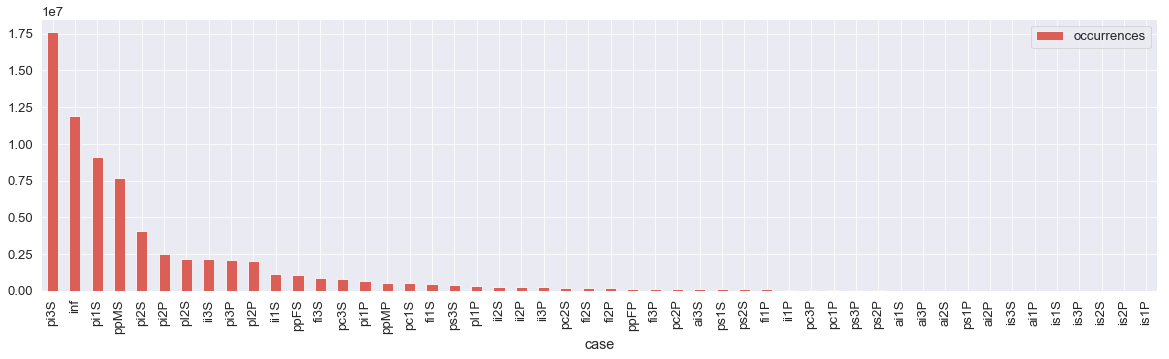

In [14]:
ax=dfCasesTokens.plot(kind="bar",figsize=(20,5))
#ax.set_yscale('log')


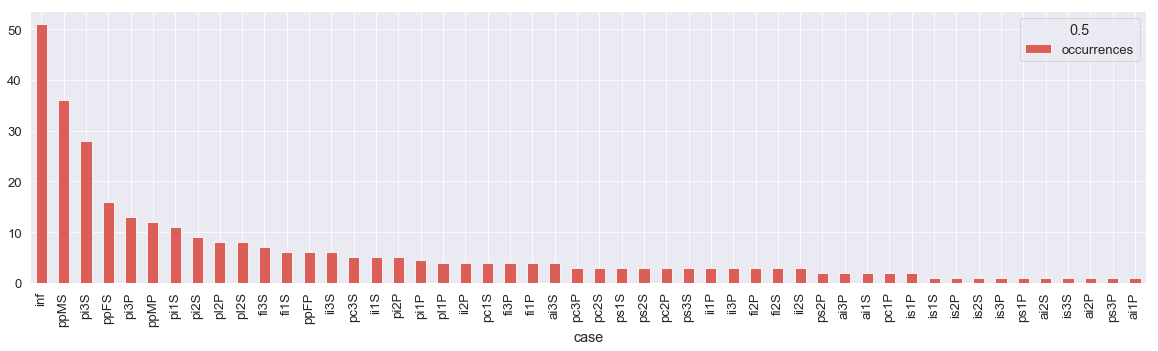

In [15]:
dfV4[dfV4["case"]!=""].groupby("case")[["occurrences"]].quantile(q=0.5).sort_values("occurrences",ascending=False).plot(kind="bar",figsize=(20,5))

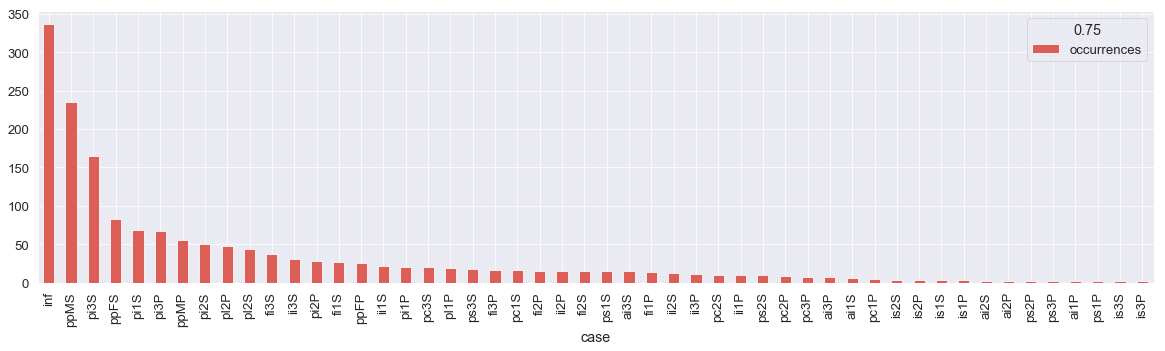

In [16]:
dfV4[dfV4["case"]!=""].groupby("case")[["occurrences"]].quantile(q=0.75).sort_values("occurrences",ascending=False).plot(kind="bar",figsize=(20,5))

In [17]:
dfV4["nb"]=1
dfV4.head()

,graphie,lemme,case,occurrences,rangFWV,nb
0,-tu,taire,ppMS,8.0,47729.5,1
1,=,égaler,pi3S,4218.0,1474.0,1
2,a,avoir,pi3S,3668058.0,2.0,1
3,a,avoir,ppMS,1.0,91305.5,1
4,abaissa,abaisser,ai3S,5.0,55988.5,1


### Lexèmes avec surabondance
Pour les lexèmes sujets à surabondance, il est possible d'avoir plus de 51 formes listées mais une partie des lexèmes de la liste ne font pas partie des surabondants.

In [18]:
dfSurabondances=dfV4.groupby(["lemme","case"]).agg({"graphie":lambda x: "-".join(x),"nb":"count"}).reset_index()
dfL4Surabondances=dfSurabondances[dfSurabondances["nb"]>1]
dfL4Surabondances.to_csv(path_or_buf="PB-Lex4-Surabondances.csv",sep="\t",encoding="utf8")

In [19]:
dfL4Surabondances

,lemme,case,nb,graphie
49,abandonner,ii3P,2,abandonnaient-abandonné
50,abandonner,ii3S,2,abandonnait-abandonné
53,abandonner,pI2P,2,abandonner-abandonnez
63,abandonner,pi2P,2,abandonner-abandonnez
112,abattre,pi2P,2,abattez-abattre
254,aborder,ii3P,2,abordaient-abordé
332,aboyer,pi2P,2,aboyer-aboyez
499,absorber,ii3P,2,absorbaient-absorbé
531,absoudre,pi2P,2,absolvez-absoudre
594,abuser,ii3P,2,abusaient-abusé


In [20]:
dfL4LexFormesV=dfV4.groupby("lemme")[["occurrences","nb"]].count()
dfL4LexFormesV[dfL4LexFormesV["occurrences"]>51].index.tolist()

[u'aller',
 u'asseoir',
 u'avoir',
 u'devoir',
 u'donner',
 u'effrayer',
 u'envoyer',
 u'essayer',
 u'laisser',
 u'payer',
 u'penser',
 u'porter',
 u'pouvoir',
 u'savoir',
 u'trouver',
 u'\xeatre']

### regroupement des formes de lexème pour une même case

In [21]:
dfL4LexCasesV=dfV4.groupby(["lemme","case"]).sum().reset_index()

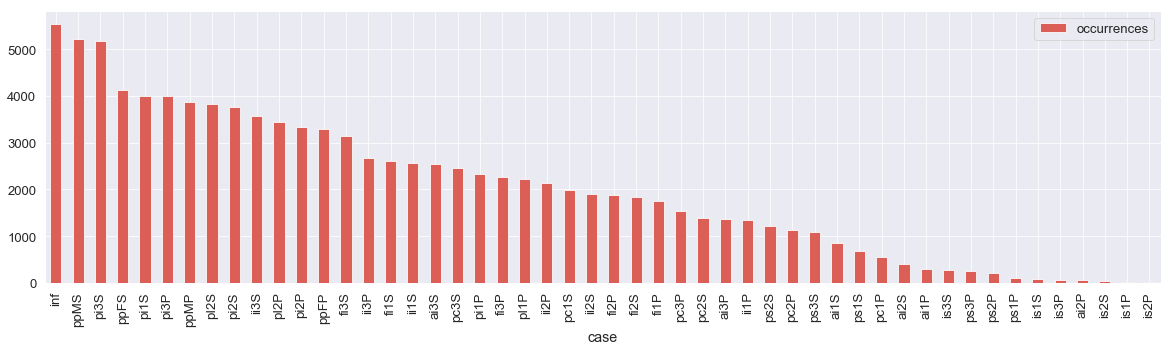

In [22]:
dfCasesTypes=dfL4LexCasesV[dfL4LexCasesV["case"]!=""].groupby("case")[["occurrences"]].count().sort_values("occurrences",ascending=False)
dfCasesTypes.plot(kind="bar",figsize=(20,5))

In [23]:
dfNbCasesPar=dfV4[dfV4["case"]!=""].groupby(["lemme","case"]).sum().reset_index().groupby("lemme")[["case"]].count()

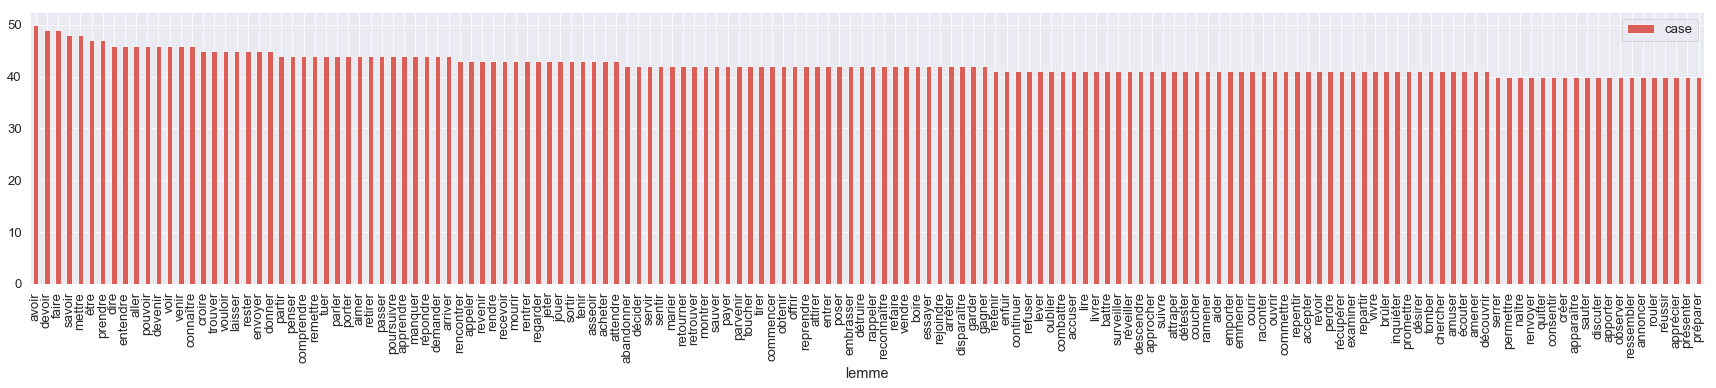

In [24]:
ax=dfNbCasesPar.sort_values("case",ascending=False)[:150].plot(kind="bar",
                                                              figsize=(30,5)
                                                              )


# French Plat from Stump & Finkel (2013)

## liste des microclasses de paradigmes radicaux

In [25]:
with codecs.open("Stump12.data","r",encoding="utf8") as fInput:
    stump12=[l.strip() for l in fInput.readlines()]

In [26]:
lStemIx={}
stemIx=0
for l in stump12[6:]:
    if l.startswith("CONJ"):
        print l
        stemIx+=1
        lStemIx[stemIx]=[]
        lStemIx[stemIx].append(re.split(ur"\s+",l))
    elif l.startswith("LEXEME"):
        break
    else:
        lStemIx[stemIx].append(re.split(ur"\s+",l))

CONJ      Stem1 Stem2 Stem3 Stem4 Stem5 Stem6 Stem7
CONJ      Stem8 Stem9 Stem10
CONJ      Stem10a Stem11 Stem12 Stem13
CONJ      Stem14 Stem15 Stem16 Stem17 Stem18 Stem19


In [27]:
stem1=pd.DataFrame(lStemIx[1][2:-1]).set_index(0)
stem2=pd.DataFrame(lStemIx[2][2:-1]).set_index(0)
stem3=pd.DataFrame(lStemIx[3][2:-1]).set_index(0)
stem4=pd.DataFrame(lStemIx[4][2:-1]).set_index(0)

In [28]:
stem1.columns=["stem%02d"%(i+1) for i in range(7)]
stem2.columns=["stem%02d"%(i+1) for i in range(7,10)]
stem3.columns=["stem10a"]+["stem%02d"%(i+1) for i in range(10,13)]
stem4.columns=["stem%02d"%(i+1) for i in range(13,19)]

In [29]:
cfVerbes=[u"ÉCROUER",u"ÉCHOUER",u"MOUDRE",u"BOUILLIR",]
stems=pd.concat([stem1,stem2,stem3,stem4],axis=1)
stems[stems.index.isin(cfVerbes)]#.head(25)
stemsSF2013=stems
%store stemsSF2013

Stored 'stemsSF2013' (DataFrame)


## Liste des microclasses de paradigmes morphosyntaxiques
- génération des étiquettes de cellules
- génération des patrons de formes pour les microclasses

In [28]:
noAffix="inf ppMS ppMP ppFS ppFP pi1S pi2S pi3S pi3P".split(" ")+ \
        "ps1S ps2S ps3S ps3P ai1S ai2S ai3S is3S pI2S".split(" ")
def inflectStem(microclasse,case):
    stem=stems[stems.index==microclasse][selectStem[case]].values[0]
    if case in noAffix:
        result=stem
    elif "1P" in case:
        if "!" not in stem:
            if case=="pc1P":
                result=stem+u"jɔ̃"
            elif case=="fi1P":
                result=stem+u"ʁɔ̃"
            elif case=="ai1P":
                result=stem+u"m"
            else:
                result=stem+u"ɔ̃"
        else:
            result=stem
    elif "2P" in case:
        if "!" not in stem:
            if case=="pc2P":
                result=stem+u"je"
            elif case=="fi2P":
                result=stem+u"ʁe"
            elif case=="ai2P":
                result=stem+u"t"
            else:
                result=stem+u"e"
        else:
            result=stem
    elif case=="ai3P":
        result=stem+u"ʁ"
    elif "fi" in case:
        result=stem+u"ʁ"
        if "1S" in case:
            result=result+u"e"
        elif "S" in case:
            result=result+u"a"
        elif "3P" in case:
            result=result+u"ɔ̃"
    elif "pc" in case:
        result=stem+u"ʁɛ"
    elif "ii" in case:
        result=stem+u"ɛ"
    elif "pP"==case:
        result=stem+u"ɑ̃"
    else:
        result="???"
    return result

In [29]:
selectStem={
     'ii1P': 'stem07',
     'ii1S': 'stem06',
     'ii2P': 'stem07',
     'ii2S': 'stem06',
     'ii3P': 'stem06',
     'ii3S': 'stem06',
     'ai1P': 'stem09',
     'ai1S': 'stem08',
     'ai2P': 'stem09',
     'ai2S': 'stem09',
     'ai3P': 'stem08',
     'ai3S': 'stem09',
     'is1P': 'stem09',
     'is1S': 'stem09',
     'is2P': 'stem09',
     'is2S': 'stem09',
     'is3P': 'stem09',
     'is3S': 'stem09',
    }

In [33]:
for c in selectStem:
    print c,inflectStem(u"FINIR",c)


ii1P -sjɔ̃
ii1S -sɛ
pP -sɑ̃
inf -ʁ
ai3S -
ai3P -ʁ
ai1P -m
ii3S -sɛ
ps3S -s
ps3P -s
ii3P -sɛ
pi2S -
ai1S -
pi2P -se
ppFS -
ppFP -
ps1P -sjɔ̃
ps1S -s
pI2S -
fi2P -ʁe
fi2S -ʁa
pI2P -se
ps2P -sje
ps2S -s
ai2P -t
ai2S -
pc2P -ʁje
pc2S -ʁɛ
ii2P -sje
pi1S -
pi1P -sɔ̃
ii2S -sɛ
pi3P -s
pi3S -
ppMS -
pc3S -ʁɛ
pc3P -ʁɛ
pc1P -ʁjɔ̃
pc1S -ʁɛ
fi3S -ʁa
fi3P -ʁɔ̃
ppMP -
fi1P -ʁɔ̃
fi1S -ʁe
pI1P -sɔ̃


In [31]:
stemSpaces={
     'stem01': ['pi1S'],
     'stem02': 'pi2S pi3S'.split(" "),
     'stem03': ['pi1P'],
     'stem04': ['pi2P'],
     'stem05': ['pi3P'],
     'stem06': "ii1S ii2S ii3S ii3P".split(" "),
     'stem07': "ii1P ii2P".split(" "),
     'stem08': "ai1S ai3P".split(" "),
     'stem09': "ai2S ai3S ai1P ai2P".split(" "),
     'stem10': "fi1S fi2S fi3S fi1P fi2P fi3P pc1S pc2S pc3S pc3P".split(" "),
     'stem10a': "pc1P pc2P".split(" "),
     'stem11': "ps1S ps2S ps3S ps3P".split(" "),
     'stem12': "ps1P ps2P".split(" "),
     'stem13': ['pI2S'],
     'stem14': ['pI1P'],
     'stem15': ['pI2P'],
     'stem16': ['inf'],
     'stem17': ['pP'],
     'stem18': "ppMS ppMP".split(" "),
     'stem19': "ppFS ppFP".split(" "),
            }
stemSpaces

{'stem01': ['pi1S'],
 'stem02': ['pi2S', 'pi3S'],
 'stem03': ['pi1P'],
 'stem04': ['pi2P'],
 'stem05': ['pi3P'],
 'stem06': ['ii1S', 'ii2S', 'ii3S', 'ii3P'],
 'stem07': ['ii1P', 'ii2P'],
 'stem08': ['ai1S', 'ai3P'],
 'stem09': ['ai2S', 'ai3S', 'ai1P', 'ai2P'],
 'stem10': ['fi1S',
  'fi2S',
  'fi3S',
  'fi1P',
  'fi2P',
  'fi3P',
  'pc1S',
  'pc2S',
  'pc3S',
  'pc3P'],
 'stem10a': ['pc1P', 'pc2P'],
 'stem11': ['ps1S', 'ps2S', 'ps3S', 'ps3P'],
 'stem12': ['ps1P', 'ps2P'],
 'stem13': ['pI2S'],
 'stem14': ['pI1P'],
 'stem15': ['pI2P'],
 'stem16': ['inf'],
 'stem17': ['pP'],
 'stem18': ['ppMS', 'ppMP'],
 'stem19': ['ppFS', 'ppFP']}

In [32]:
selectStem={}
for s,cells in stemSpaces.iteritems():
    for c in cells:
        selectStem[c]=s
selectStem

{'ai1P': 'stem09',
 'ai1S': 'stem08',
 'ai2P': 'stem09',
 'ai2S': 'stem09',
 'ai3P': 'stem08',
 'ai3S': 'stem09',
 'fi1P': 'stem10',
 'fi1S': 'stem10',
 'fi2P': 'stem10',
 'fi2S': 'stem10',
 'fi3P': 'stem10',
 'fi3S': 'stem10',
 'ii1P': 'stem07',
 'ii1S': 'stem06',
 'ii2P': 'stem07',
 'ii2S': 'stem06',
 'ii3P': 'stem06',
 'ii3S': 'stem06',
 'inf': 'stem16',
 'pI1P': 'stem14',
 'pI2P': 'stem15',
 'pI2S': 'stem13',
 'pP': 'stem17',
 'pc1P': 'stem10a',
 'pc1S': 'stem10',
 'pc2P': 'stem10a',
 'pc2S': 'stem10',
 'pc3P': 'stem10',
 'pc3S': 'stem10',
 'pi1P': 'stem03',
 'pi1S': 'stem01',
 'pi2P': 'stem04',
 'pi2S': 'stem02',
 'pi3P': 'stem05',
 'pi3S': 'stem02',
 'ppFP': 'stem19',
 'ppFS': 'stem19',
 'ppMP': 'stem18',
 'ppMS': 'stem18',
 'ps1P': 'stem12',
 'ps1S': 'stem11',
 'ps2P': 'stem12',
 'ps2S': 'stem11',
 'ps3P': 'stem11',
 'ps3S': 'stem11'}

In [35]:
dfVerbes4

,graphie,lemme,infover,genre,nombre,occurrences,rangFWV
0,-tu,taire,par:pas:,m,s,8.0,50103.0
1,=,égaler,ind:pre:3,,s,4218.0,1492.0
2,a,avoir,ind:pre:3,,s,3668058.0,2.0
3,a,avoir,par:pas:,m,s,1.0,96696.0
4,abaissa,abaisser,ind:pas:3,,s,5.0,58893.5
5,abaissaient,abaisser,ind:imp:3,,p,3.0,69509.5
6,abaissais,abaisser,ind:imp:1,,s,4.0,63365.5
7,abaissais,abaisser,ind:imp:2,,s,3.0,69509.5
8,abaissait,abaisser,ind:imp:3,,s,6.0,55369.5
9,abaissant,abaisser,par:pre,,,25.0,32122.0
